In [1]:
from pose import *

In [7]:
d = 1.08585 # 3 ft 6.75 in, 1.3843 for other
poses, heading, pulses_b, pulses_f, valid, error_high, error_low = plot_files(d, "exp5b.txt", "exp5f.txt", phi=5.8)

_p = poses
_eh = error_high
_el = error_low

error_high = _eh[0:2]
error_high.extend(_eh[3:])

error_low = _el[0:2]
error_low.extend(_el[3:])

poses = _p[0:2]
poses.extend(_p[3:])

i = -1

time = [elem.time - elem.begin for i, elem in enumerate(np.array(valid).T[1]) if i != 2]

poses.append((0, 0))
poses.append((d, 0))
poses = np.array(poses).T

error_high = np.array(error_high).T
error_low = np.array(error_low).T

print(error_high)
print(error_low)

if i >= 0:
    plt.scatter(poses[0][:i], poses[1][:i], color="g")
    plt.plot(poses[0][:i], poses[1][:i], "orange", label="Drone Path") 
    plt.scatter(xy_means[0][:i], xy_means[1][:i], color="b")
    plt.plot(xy_means[0][:i], xy_means[1][:i], "red", label="Ground Truth")
elif False:
    plt.scatter(poses[0][:-2], poses[1][:-2], color="g")
    plt.plot(poses[0][:-2], poses[1][:-2], "orange", label="Drone Path")
    plt.scatter(xy_means[0], xy_means[1], color="b")
    plt.plot(xy_means[0], xy_means[1], "red", label="Ground Truth")

[[ 0.45187057  0.32353002  0.18014308  0.24768741 -0.03637542 -0.4584304
  -0.44542944]
 [ 1.19545816  1.95031578  2.48419461  1.79146116  2.18963536  2.61397752
   1.74727808]]
[[ 0.31113085  0.12160766 -0.06591617  0.06410698 -0.24048278 -0.67122568
  -0.56051662]
 [ 1.16306525  1.88603011  2.38670712  1.71379655  2.05290848  2.39168544
   1.53739841]]


In [15]:
err = (error_high - error_low)
err

array([[0.14073972, 0.20192235, 0.24605925, 0.18358043, 0.20410736,
        0.21279528, 0.11508718],
       [0.03239291, 0.06428566, 0.09748748, 0.07766462, 0.13672688,
        0.22229208, 0.20987967]])

0.06077314055820887


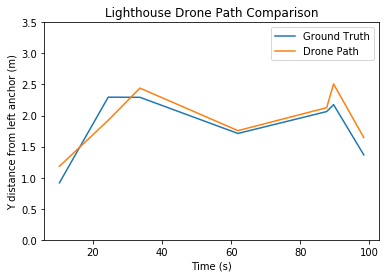

In [297]:
plt.plot(time, xy_means[1], label="Ground Truth")
plt.plot(time, poses[1][:-2], label="Drone Path")
plt.ylim(0, 3.5)

print((np.square(xy_means[1] - poses[1][:-2])).mean(axis=0))

# plt.plot(poses[0][-2:], poses[1][-2:], label='Anchor Nodes') 
plt.title("Lighthouse Drone Path Comparison")
plt.xlabel("Time (s)")
plt.ylabel("Y distance from left anchor (m)")

plt.legend()

0.24652208939202358


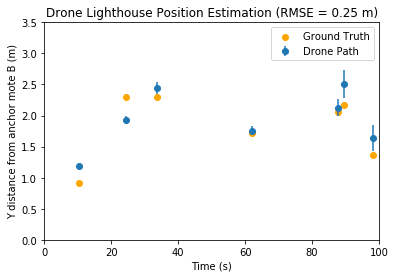

In [34]:
plt.scatter(time, xy_means[1], color="orange", label="Ground Truth")
# plt.scatter(time, poses[1][:-2], label="Drone Path")
plt.errorbar(time, poses[1][:-2], yerr=err[1], fmt='o', label="Drone Path")

plt.xlim(0, 100)
plt.ylim(0, 3.5)

print((np.sqrt(np.mean((xy_means[1] - poses[1][:-2])**2))))

# plt.plot(poses[0][-2:], poses[1][-2:], label='Anchor Nodes') 
plt.title("Drone Lighthouse Position Estimation (RMSE = 0.25 m)")
plt.xlabel("Time (s)")
plt.ylabel("Y distance from anchor mote B (m)")

plt.legend()

plt.savefig("ypositionestimate.png", format='png')

0.17939901634870065


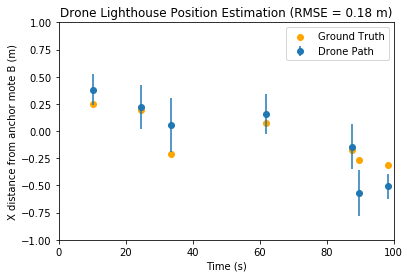

In [35]:
plt.scatter(time, xy_means[0], color="orange", label="Ground Truth")
# plt.scatter(time, poses[0][:-2], label="Drone Path")
plt.errorbar(time, poses[0][:-2], yerr=err[0], fmt='o', label="Drone Path")

print((np.sqrt(np.mean((xy_means[0] - poses[0][:-2])**2))))

plt.xlim(0, 100)
plt.ylim(-1, 1)

# plt.plot(poses[0][-2:], poses[1][-2:], label='Anchor Nodes') 
plt.title("Drone Lighthouse Position Estimation (RMSE = 0.18 m)")
plt.xlabel("Time (s)")
plt.ylabel("X distance from anchor mote B (m)")

plt.legend()

plt.savefig("xpositionestimate.png", format='png')

In [246]:
[int(elem.time - elem.begin) - .5 for elem in np.array(valid).T[1]]

[16.5, 22.5, 38.5, 49.5, 73.5, 80.5, 85.5, 95.5, 110.5, 112.5]

In [2]:
ground = [[(599, 919), (593, 912), (587, 910), (586, 912), (583, 906), (578, 903), (575, 903), (572, 902), (570, 897), (567, 895), (565, 888), (565, 886), (562, 880), (557, 871), (555, 872)],
          [(543, 750), (532, 743), (529, 741), (525, 735), (520, 729), (517, 724), (518, 720), (517, 714), (517, 708), (518, 706), (518, 699), (518, 695), (518, 689), (523, 684), (524, 679), (527, 674), (530, 671), (533, 668)],
          [(681, 345), (671, 344), (664, 349), (662, 348), (657, 348), (650, 347), (649, 347), (644, 345), (644, 342), (640, 342), (639, 338), (639, 337), (641, 334), (641, 334), (641, 334), (646, 329), (649, 324), (653, 323)],
          [(696, 420), (694, 416), (693, 415), (690, 415), (690, 414), (686, 413), (686, 410), (682, 410), (682, 410), (678, 407), (675, 403), (672, 403), (670, 402), (667, 398), (663, 396), (664, 392), (661, 390), (661, 388), (657, 385), (653, 380), (653, 374), (650, 370), (651, 367), (650, 362), (650, 359), (652, 355), (653, 352), (655, 349), (658, 347), (661, 342), (664, 342), (666, 341)],
          [(191, 973), (185, 969), (177, 971), (169, 973), (163, 973), (158, 976), (149, 978), (145, 983), (140, 986), (136, 992), (131, 992), (130, 993), (125, 995), (119, 1000), (114, 1003)],
          [(783, 633), (780, 629), (778, 627), (771, 629), (768, 632), (763, 632), (757, 637), (752, 641), (751, 642), (747, 649), (743, 656), (739, 666), (736, 672), (740, 675), (740, 683), (740, 691), (741, 703)],
          [(641, 853), (639, 854), (634, 856), (627, 860), (620, 865), (615, 873), (612, 878), (609, 887), (606, 890), (602, 897), (599, 903), (598, 913), (598, 915)], 
          [(144, 874), (136, 878), (132, 879), (128, 881), (122, 884), (112, 891), (107, 898), (102, 903), (98, 907), (97, 911), (93, 920), (92, 928), (88, 938), (87, 946)],
          [(713, 720), (709, 720), (701, 718), (698, 718), (692, 719), (683, 716), (679, 718), (679, 718), (674, 723), (670, 730), (666, 733), (665, 740), (663, 745), (659, 751)],
          [(711, 646), (704, 652), (693, 654), (690, 657), (682, 668), (676, 673), (672, 678), (668, 685), (663, 694), (662, 702), (662, 706), (662, 714), (663, 719), (666, 727), (668, 733), (671, 735)]
         ]  

ground = [[(745, 142), (740, 141), (734, 143), (731, 143), (724, 145), (723, 146), (719, 148), (715, 152), (715, 150), (714, 153), (714, 156), (712, 159), (712, 161), (711, 164), (711, 166), (711, 168), (713, 167), (714, 172), (714, 174), (715, 175), (716, 174), (719, 175), (722, 175)],
          [(764, 1007), (764, 1007), (764, 1007), (764, 1007), (764, 1007), (764, 1007), (764, 1007), (764, 1007), (764, 1007), (757, 1006), (748, 1006), (744, 1007), (737, 1007), (733, 1006), (733, 1006), (741, 1007)],
          [(964, 1007), (964, 1007), (970, 1007), (981, 1004), (988, 1004), (995, 1004), (998, 1003), (998, 1003), (998, 1003), (1008, 1005), (1014, 1005), (1013, 1006), (1017, 1005), (1025, 1007), (1030, 1007), (1034, 1006), (1040, 1006), (1043, 1007)],
          [(849, 619), (845, 620), (840, 627), (836, 627), (834, 629), (834, 630), (830, 635), (828, 639), (825, 644), (825, 647), (823, 649), (823, 650), (825, 657), (824, 661), (825, 666), (827, 669), (826, 677), (826, 677), (828, 680)],
          [(982, 842), (980, 843), (979, 845), (980, 850), (979, 851), (979, 855), (979, 864), (979, 864), (980, 866), (982, 871), (984, 874), (988, 878), (987, 880), (991, 888), (994, 891)],
          [(1045, 884), (1044, 889), (1043, 896), (1038, 905), (1037, 907), (1036, 913), (1036, 918), (1036, 925), (1036, 932), (1035, 942), (1036, 951), (1039, 956), (1039, 967), (1041, 972), (1045, 979), (1048, 986)],
          [(1063, 454), (1064, 452), (1064, 447), (1065, 443), (1066, 438), (1067, 435), (1068, 433), (1068, 431), (1069, 427), (1069, 416), (1072, 413)]]
          

In [3]:
xy = [np.array(g).T for g in ground]

In [5]:
xy_means = np.array([pix_to_world(np.mean(elem, axis=1)) for elem in xy]).T
xy_means

array([[ 0.25091445,  0.1940052 , -0.21260929,  0.07071093, -0.17753245,
        -0.2697988 , -0.31400404],
       [ 0.91718737,  2.2958552 ,  2.29355227,  1.71190118,  2.06401755,
         2.1753576 ,  1.36700953]])

In [4]:
def pix_to_world(xy):
    x, y = 1920 - xy[0], xy[1]
    x_real = (((x - 769) / (375.0 / 2.0)) * .3048) - .45085
    y_real = (((y - 196) / (375.0 / 2.0)) * .3048) + .9779
    
    return [x_real, y_real]